 # Reaching_Task_2026_Ex1_Zhidong_Yuzhe

## Task 1

The executable Python file is provided in the `_code.py` file, while the utility functions are in the `utils.py` file. The data files are in the `./output/` directory.

The core issues addressed in the code include:
1. implementing the clockwise 'sudden' and counterclockwise 'gradual' perturbations

```python
    if perturbation_mode:
        if perturbation_type == 'sudden':
            # sudden clockwise perturbation of perturbation_angle
            perturbed_mouse_angle = perturbation_angle
        
        elif perturbation_type == 'gradual':
            # gradual counterclockwise perturbation of perturbation_angle in 10 steps, with perturbation_angle/10, each step lasts 3 attempts
            perturbed_mouse_angle = max(-(gradual_attempts // 3 + 1) * (perturbation_angle / 10), -perturbation_angle)

        perturbed_mouse_pos = [
            START_POSITION[0] + distance * math.cos(mouse_angle + perturbed_mouse_angle),
            START_POSITION[1] + distance * math.sin(mouse_angle + perturbed_mouse_angle)
        ]
        circle_pos = perturbed_mouse_pos
```


2. calculating the error angles, set `NaN` for invalid trials, and saving the results to csv files

``` python
    if check_target_reached():
        ...
        # CALCULATE AND SAVE ERRORS between target and circle end position for a hit
        if move_faster:
            error_angle = float("NaN")
        else:
            # Change to calculation of error_angle
            assert new_target is not None, "new_target must not be None when calculating error_angle on hit."
            cursor_angle = math.degrees(
                math.atan2((circle_pos[1] - START_POSITION[1]), circle_pos[0] - START_POSITION[0]))
            target_angle = math.degrees(
                math.atan2(new_target[1] - START_POSITION[1], (new_target[0] - START_POSITION[0])))
            error_angle = cursor_angle - target_angle
            # error_angle = 0.0
        error_angles.append(error_angle)
        ...

    # miss if player leaves the target_radius + 1% tolerance
    elif new_target and math.hypot(circle_pos[0] - START_POSITION[0],
                                   circle_pos[1] - START_POSITION[1]) > TARGET_RADIUS * 1.01:
        ...
        # CALCULATE AND SAVE ERRORS between target and circle end position for a miss
        if move_faster:
            error_angle = float("NaN")
        else:
            cursor_angle = math.degrees(
                math.atan2((circle_pos[1] - START_POSITION[1]), circle_pos[0] - START_POSITION[0]))
            target_angle = math.degrees(
                math.atan2(new_target[1] - START_POSITION[1], (new_target[0] - START_POSITION[0])))
            error_angle = cursor_angle - target_angle
        error_angles.append(error_angle)
        ...
```

## Task 2

=== Mask Condition ===
Motor Variability (STD) in the unperturbed segments: 1.8577 degrees
Saved plot to `./output/error_angles_Mask_StartAngle_0_Target_fix.png`


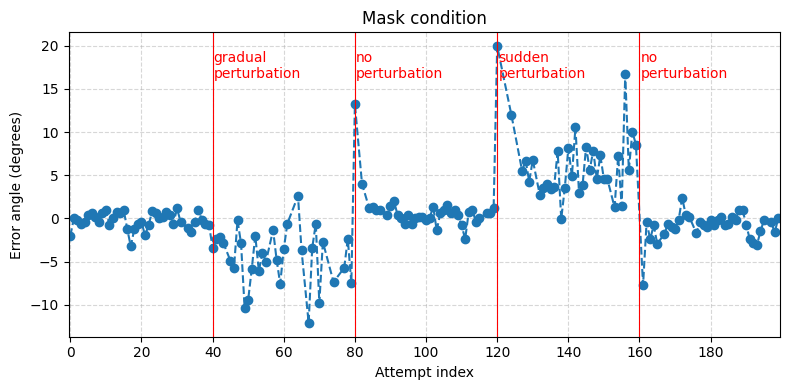


=== No Mask Condition ===
Motor Variability (STD) in the unperturbed segments: 0.8837 degrees
Saved plot to `./output/error_angles_NoMask_StartAngle_0_Target_fix.png`


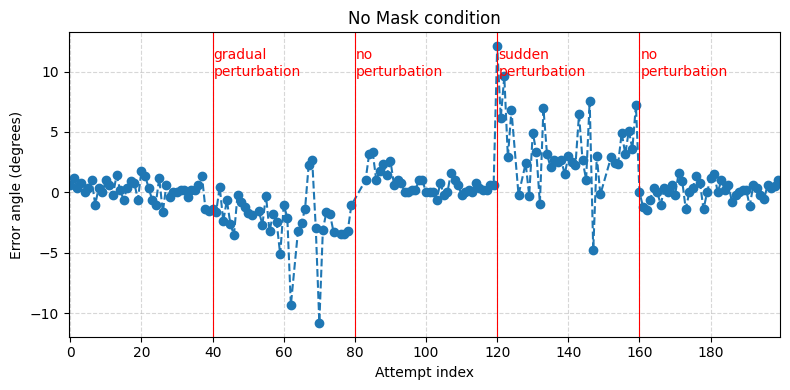

In [2]:
from utils import *

file_name_mask = 'error_angles_Mask_StartAngle_0_Target_fix'
file_name_nonmask = 'error_angles_NoMask_StartAngle_0_Target_fix'

# Mask condition
print ("=== Mask Condition ===")
errors_mask = read_error_list(file_name=file_name_mask+'.csv')
std_mask = compute_variability(errors_mask[:Interval_General[0]] + errors_mask[Interval_General[1]: Interval_Sudden[0]] + errors_mask[Interval_Sudden[1]:])
print(f"Motor Variability (STD) in the unperturbed segments: {std_mask:.4f} degrees")
plot_errors(errors_mask, title='Mask condition', file_name=file_name_mask+'.png') # remove file_name argument to not save the figure

# NOn-mask condition
print ("\n=== No Mask Condition ===")
errors_nonmask = read_error_list(file_name=file_name_nonmask+'.csv')
std_nonmask = compute_variability(errors_nonmask[:Interval_General[0]] + errors_nonmask[Interval_General[1]: Interval_Sudden[0]] + errors_nonmask[Interval_Sudden[1]:])
print(f"Motor Variability (STD) in the unperturbed segments: {std_nonmask:.4f} degrees")
plot_errors(errors_nonmask, title='No Mask condition', file_name=file_name_nonmask+'.png') # remove file_name argument to not save the figure

When it change to 'No Mask' condition, the subject can see the final movement towards the target, which allows corrections near the end and therefore result in lower motor variability during unperturbed segments.


## Task 3


First, we define the signed error angle as error angle = cursor direction − target direction.

Positive values therefore indicate a counter-clockwise (CCW) deviation of the cursor relative to the target, whereas negative values indicate a clockwise (CW) deviation.


- *What do you see when perturbation is introduced? Is there an after-effect?*

Under baseline (no-perturbation) conditions, error angles fluctuate narrowly around zero. This reflects low motor variability (MV) intrinsic to the subject’s motor system, rather than variability induced by the environment, and indicates that the internal visuomotor model is well calibrated.

When a visuomotor perturbation is introduced, both the magnitude and the variability of the error increase, indicating a mismatch between predicted and actual sensory consequences of movement, i.e. a sensory prediction error.


After removal of the perturbation, a transient error in the opposite direction—referred to as the **after-effect** is observed. This after-effect demonstrates that adaptation reflects a genuine change in the internal predictive model. Notably, gradual perturbation produces a larger after-effect, consistent with the fact that learning in this condition relies predominantly on implicit adaptation of the forward model. In contrast, during sudden perturbation, compensation is partly achieved through explicit strategies, which do not contribute to the after-effect.

- *What is the difference between gradual and sudden perturbation?* 

During gradual perturbation, the rotation is introduced in small increments. As a result, prediction errors remain relatively small but persistent. This leads to a slow, continuous drift of the error over trials, reflecting implicit cerebellar adaptation of the forward model. Because the perturbation is subtle, explicit re-aiming strategies are less likely to be recruited.

In contrast, sudden perturbation produces a large immediate error because the full rotation is applied at once. This large error often elicits explicit corrective strategies in addition to implicit adaptation. Over trials, the total error decreases as the system compensates for the abrupt change.

- *Why is it important to mask the last part of the trajectory?*

Masking the final part of the trajectory removes endpoint visual feedback and thereby limits online error correction and explicit strategies. Consequently, the measured errors primarily reflect feedforward motor commands generated by the internal model. Without masking, visual feedback allows online corrections, leading to smaller mean errors and reduced motor variability.


## Task 4
Change the target angle to be 45 degrees instead of 0, which make the task more difficult. And the result shows that the subject produce more errors and the motor variability during the unperturbed parts increase significantly.

We supposed that angles closer to the horizontal and vertical axes are easier to reach, as they align better with natural arm movements. Angles like 45 degrees may require more complex coordination, leading to higher motor variability.

We are interested because we wonder whether the choice of the target angle can make some difference, and whether the effect has isotropy.

=== Target angle 45 degrees ===
Motor Variability (STD) in the unperturbed segments: 2.1303 degrees
Saved plot to `./output/error_angles_Mask_StartAngle_45_Target_fix.png`


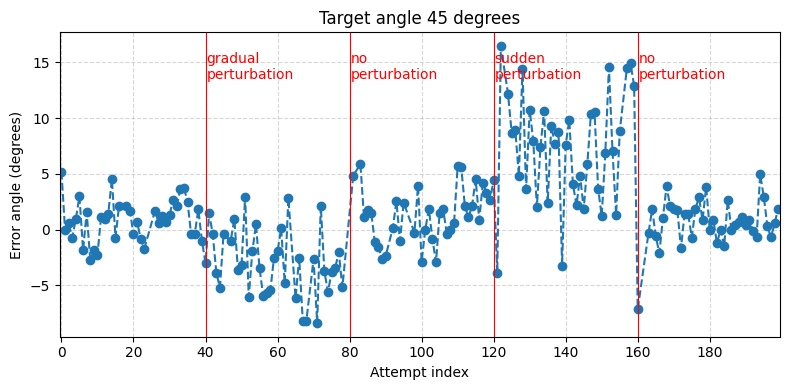

In [2]:
print ("=== Target angle 45 degrees ===")
file_name_45 = 'error_angles_Mask_StartAngle_45_Target_fix'
errors_mask = read_error_list(file_name=file_name_45+'.csv')
std_mask = compute_variability(errors_mask[:Interval_General[0]] + errors_mask[Interval_General[1]: Interval_Sudden[0]] + errors_mask[Interval_Sudden[1]:])
print(f"Motor Variability (STD) in the unperturbed segments: {std_mask:.4f} degrees")
plot_errors(errors_mask, title='Target angle 45 degrees', file_name=file_name_45+'.png') # remove file_name argument to not save the figure
